In [170]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

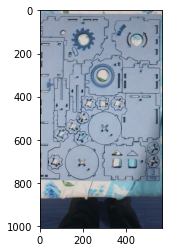

In [171]:
img = cv2.imread('4 resized.jpg', cv2.IMREAD_COLOR)
img1 = img.copy()
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# gray_blurred = cv2.GaussianBlur(gray, (11,11), cv2.BORDER_DEFAULT)
gray_blurred = cv2.blur(gray, (3, 3))
plt.imshow(img1)


In [172]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
# thresh = cv2.Canny(gray, threshold1=100, threshold2=180)
cv2.imshow("thresholding", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [173]:
detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 10, param1 = 100,
                                    param2 = 110, minRadius = 0, maxRadius = 0)

In [174]:
if detected_circles is not None:
  
    detected_circles = np.uint16(np.around(detected_circles))
    print(detected_circles)
    for pt in detected_circles[0, :]:
        x, y, r = pt[0], pt[1], pt[2]
        cv2.circle(img1, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img1, (x, y), 1, (0, 0, 255), 3)

[[[300 546  76]
  [274 512 116]
  [266 356 100]
  [292 302  44]
  [304 362  77]]]


In [175]:
# cv2.namedWindow("detected circles", cv2.WINDOW_NORMAL)
# img = cv2. resize(img, (1000, 800))
cv2.imshow("detected circles", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [176]:
# def get_points_on_circle(x_centre, y_centre, radius):
#     points=[]
#     degrees = np.arange(360)
#     x = np.int32(np.round(np.cos(degrees) * radius)) + x_centre
#     y = np.int32(np.round(np.sin(degrees) * radius)) + y_centre
#     points=list(zip(y,x))
#     return points

In [177]:
def get_points_on_circle(x_centre, y_centre, radius):
    points=[]
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    cv2.circle(mask, center=(x_centre, y_centre), radius=radius, color=255, thickness=1)
    y,x=np.where(mask)
    points=list(zip(y,x))
    return points


In [178]:
def check_neighbours(img, points, dist):
    badpixels=[]
    for point in points:
        rows, cols = img.shape
        i, j = point[1], point[0]
        rmin = i - dist if i - dist >= 0 else 0
        rmax = i + dist if i + dist < rows else i
        cmin = j - dist if j - dist >= 0 else 0
        cmax = j + dist if j + dist < cols else j
        neighbours = []

        for x in range(rmin, rmax + 1):
            for y in range(cmin, cmax + 1):
                neighbours.append([x, y])
        neighbours.remove([point[1], point[0]])
        neighbours_flip = np.flip(neighbours)
        
        values=[]
        for px in neighbours_flip:
            y, x = px[0], px[1]
            values.append(thresh[y,x])
        
        if(np.max(values)==0):
           badpixels.append(point)
    
    return badpixels


In [179]:
# img2=img.copy()
# points=get_points_on_circle(496, 64, 34)
# for point in points:
#     if thresh[point]==255:
#         points.remove(point)
# bad_pixels=check_neighbours(thresh,points,1)
# print(bad_pixels)
# if bad_pixels:
#     bad2=np.flip(bad_pixels)
#     for px in bad2:
#         x=px[0]
#         y=px[1]
#         cv2.circle(img2, (x, y), 1, (0, 0, 255), 2)
    
# cv2.imshow("bad pixels", img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [180]:
img3=img.copy()
def check_convexity():
    for circle in detected_circles[0, :]:
        x, y, r = circle[0], circle[1], circle[2]
        points = get_points_on_circle(x,y,r)
        # for point in points:
        #     if thresh[point]==255:
        #         points.remove(point)

        bad_pixels=check_neighbours(thresh,points,1)
        if bad_pixels:
            bad_pixels_flip=np.flip(bad_pixels)
            print(bad_pixels)
            for px in bad_pixels_flip:
                a=px[0]
                b=px[1]
                cv2.circle(img3, (a, b), 1, (0, 0, 255), 2)
        
check_convexity()
cv2.imshow("bad pixels", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()   

[(599, 246), (600, 247), (601, 248), (621, 297), (621, 298), (621, 299), (621, 301)]
[(398, 253), (399, 248), (399, 249), (399, 250), (399, 251), (399, 252), (400, 246), (400, 247), (401, 305), (401, 306), (401, 307), (402, 308), (402, 309), (402, 310), (406, 320), (406, 321), (407, 225), (407, 226), (407, 322), (407, 323), (408, 223), (408, 224), (408, 324), (408, 325), (409, 326), (409, 327), (410, 328), (410, 329), (416, 209), (416, 210), (416, 339), (417, 208), (417, 340), (418, 207), (418, 341), (419, 205), (419, 206), (419, 342), (419, 343), (420, 204), (420, 344), (421, 203), (421, 345), (422, 201), (422, 202), (423, 200), (424, 199), (427, 352), (428, 353), (428, 354), (429, 355), (430, 356), (431, 357), (432, 358), (433, 358), (434, 359), (435, 360), (436, 187), (436, 361), (437, 186), (437, 362), (438, 185), (438, 363), (439, 184), (440, 184), (441, 183), (442, 182), (443, 181), (444, 181), (445, 180), (446, 179), (453, 373), (465, 380), (466, 380), (467, 380), (468, 381), (4